Distances and Travel Times from Earth🌎:
Mercury:
  Distance: 207831071.36 km
  Travel Time: 173.19 days
Venus:
  Distance: 88268148.95 km
  Travel Time: 73.56 days
Earth:
  Distance: 0.00 km
  Travel Time: 0.00 days
Mars:
  Distance: 116557858.75 km
  Travel Time: 97.13 days
Jupiter:
  Distance: 698755664.04 km
  Travel Time: 582.30 days
Saturn:
  Distance: 1355588427.76 km
  Travel Time: 1129.66 days
Uranus:
  Distance: 2797647503.32 km
  Travel Time: 2331.37 days
Neptune:
  Distance: 4417510947.11 km
  Travel Time: 3681.26 days


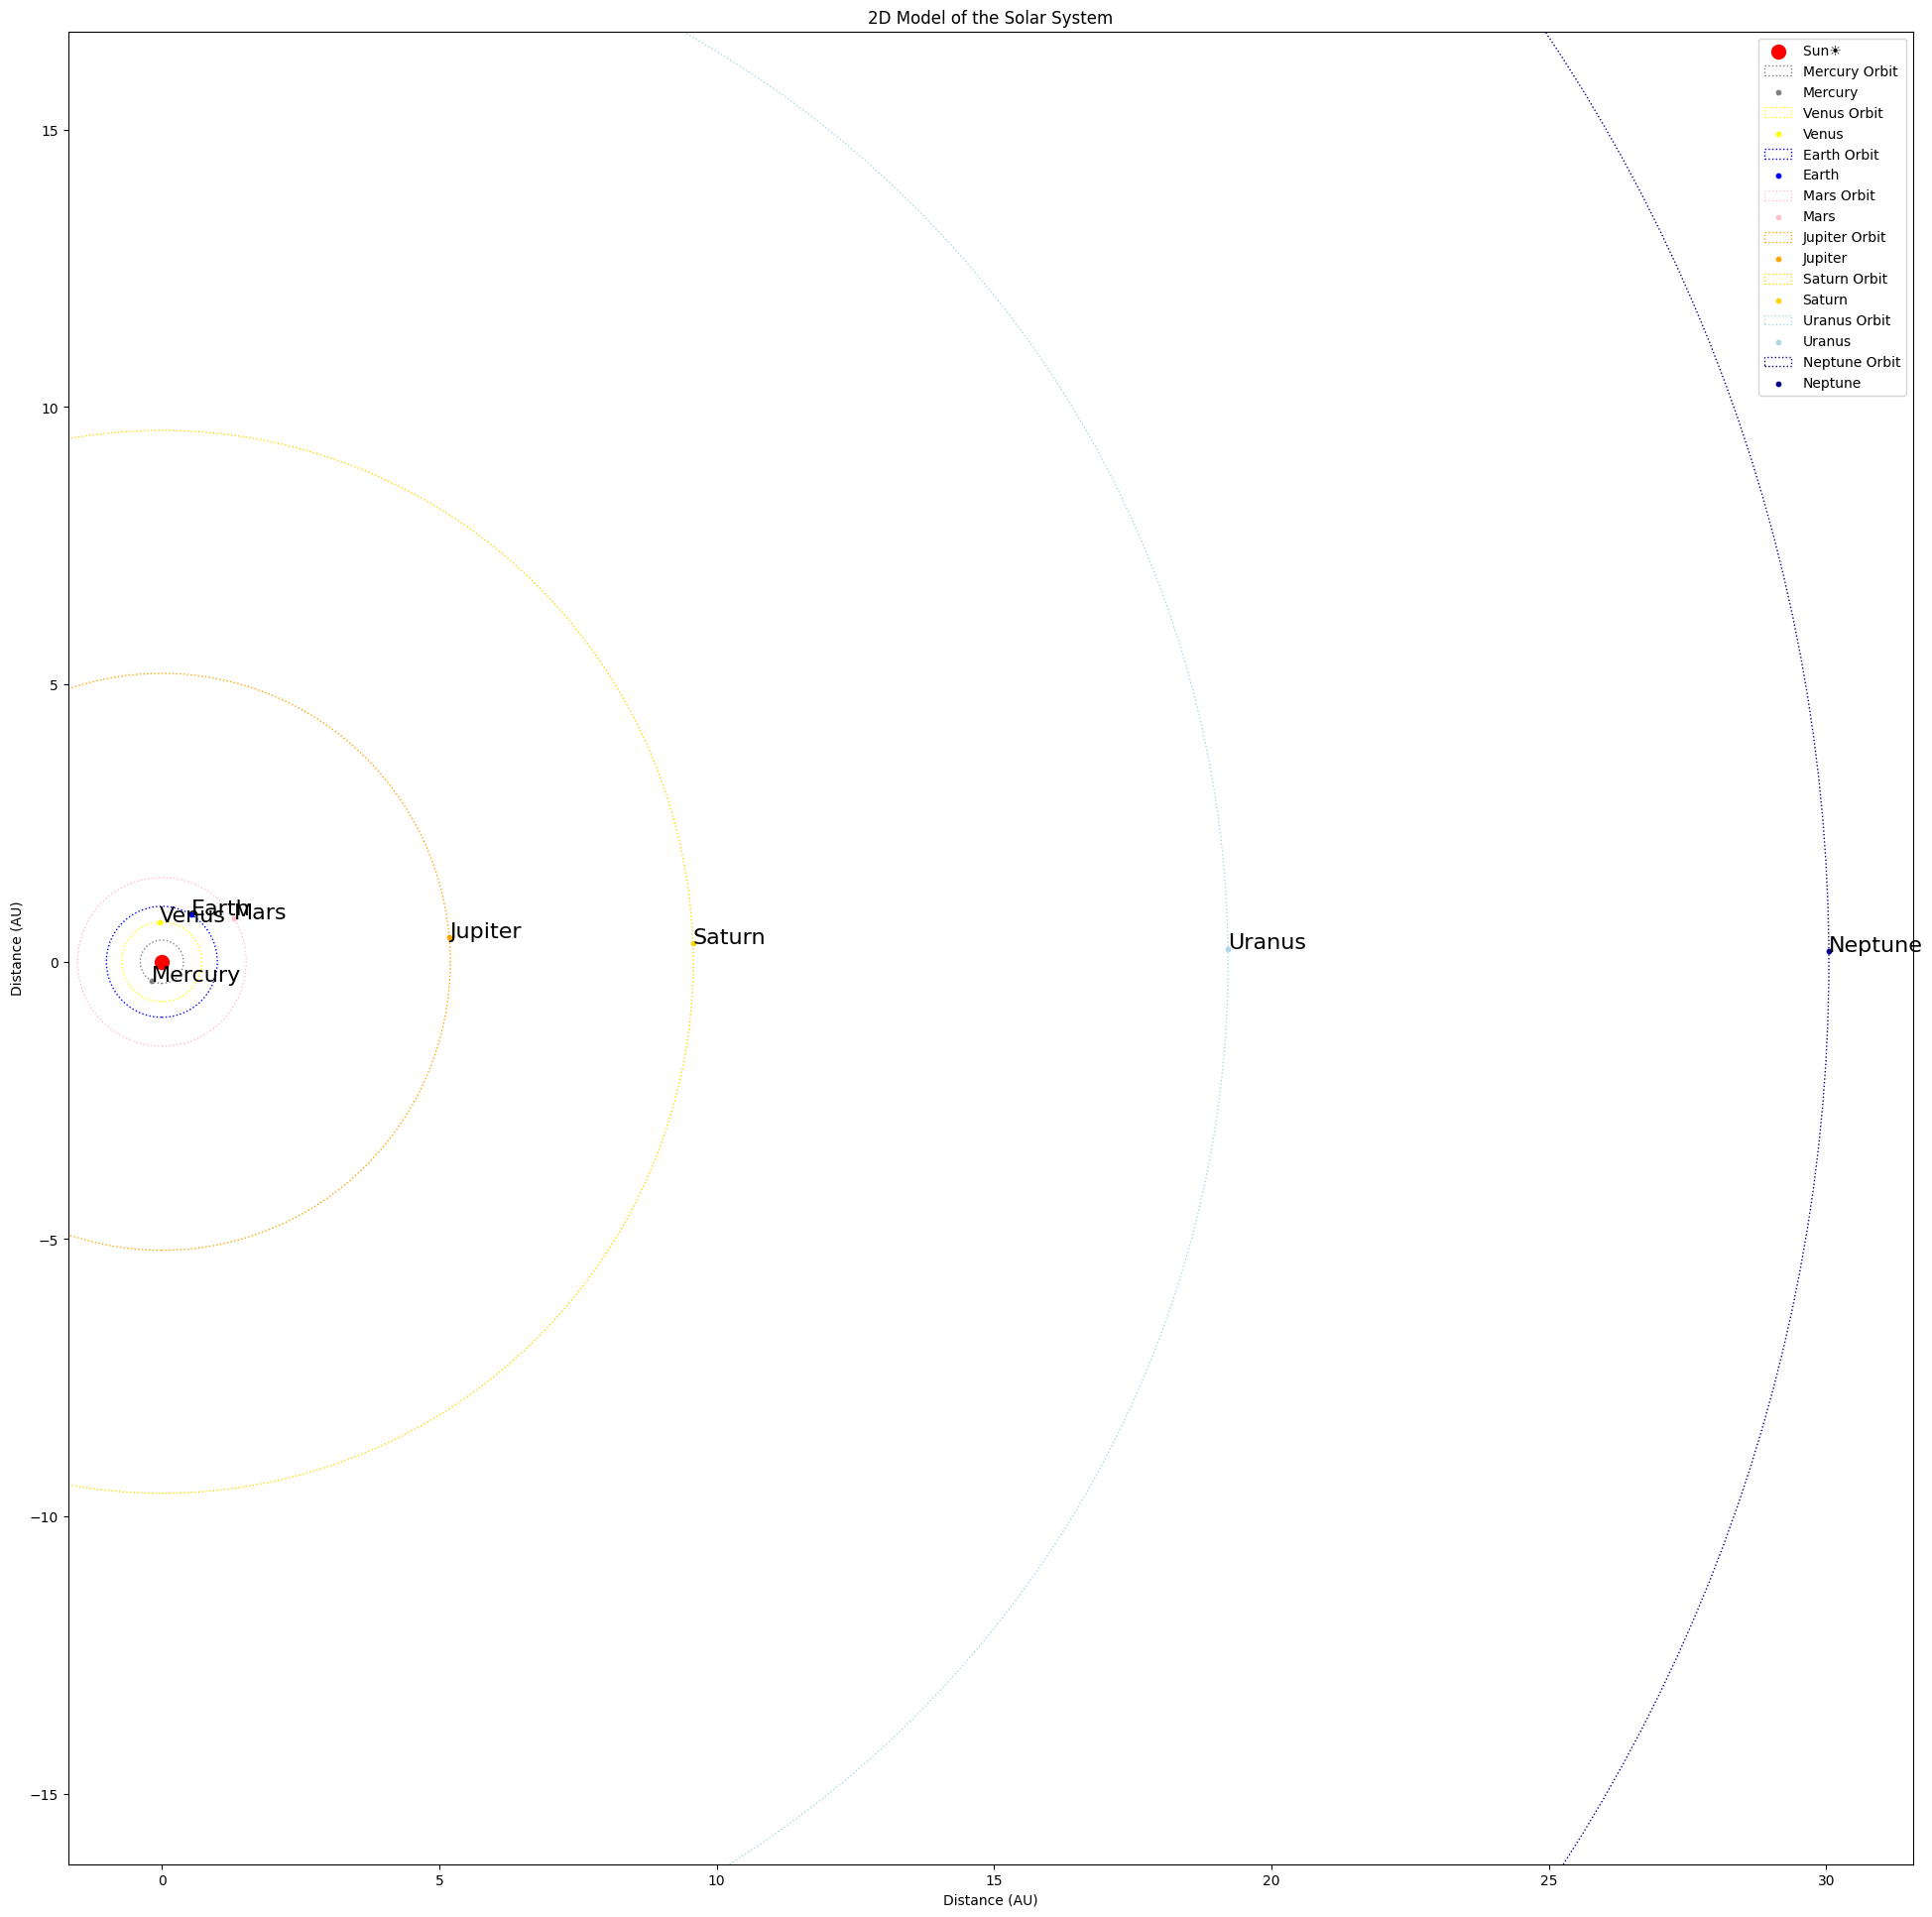

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Constants of astronomical units.
AU_TO_KM = 149597870.7  # 1 AU in kilometers.
SPACECRAFT_SPEED = 50000  # Speed of the spacecraft in km/h =13.8km/s
SECONDS_IN_DAY = 86400  # Seconds in one day
EARTH_YEAR_IN_SECONDS = 365.25 * SECONDS_IN_DAY

# Planetary Data (distance in AU, orbital period in Earth years)
# Orbital period time taken Earth 🌎  to complete one rotation which is 1 according to other planets. So time period of Mercury is 4.1 times.
planets = {
    "Mercury": {"distance": 0.39, "period": 0.24, "color": "gray"},
    "Venus": {"distance": 0.72, "period": 0.62, "color": "yellow"},
    "Earth": {"distance": 1.00, "period": 1.00, "color": "blue"},
    "Mars": {"distance": 1.52, "period": 1.88, "color": "pink"},
    "Jupiter": {"distance": 5.20, "period": 11.86, "color": "orange"},
    "Saturn": {"distance": 9.58, "period": 29.46, "color": "gold"},
    "Uranus": {"distance": 19.22, "period": 84.01, "color": "lightblue"},
    "Neptune": {"distance": 30.05, "period": 164.8, "color": "darkblue"},
}

# Calculate planet position by angular_velocity with is omega = 2pi/◇t
def calculate_position(distance, period, days_elapsed):
    """
    Calculate the x, y position of a planet based on its orbital period and distance.
    """
    # Calculate angular position (theta) in radians radian is angle between 2 points.
    angular_velocity = (2 * np.pi) / (period * EARTH_YEAR_IN_SECONDS)
    theta = angular_velocity * days_elapsed * SECONDS_IN_DAY
    x = distance * np.cos(theta)
    y = distance * np.sin(theta)
    return x, y

# Calculate distance and traveling time from Earth to find distance we have use golden formula.
def calculate_distance_and_time(earth_position, planet_position):
    """
    Calculate the straight-line distance (in km) and travel time (in days)
    between Earth and another planet.
    """
    # Distance in AU.
    distance_au = np.sqrt(
        (earth_position[0] - planet_position[0]) ** 2 +
        (earth_position[1] - planet_position[1]) ** 2
    )
    # Convert AU to km.
    distance_km = distance_au * AU_TO_KM
    # Calculate travel time (in hours) '.' t= d/v.
    travel_time_hours = distance_km / SPACECRAFT_SPEED
    # Convert hours to days
    travel_time_days = travel_time_hours / 24
    return distance_km, travel_time_days

# Simulate and plot the Solar System by size of 24by24.
def simulate_solar_system(days_elapsed):
    """
    Plot a 2D model of the solar system showing the orbits and positions of the planets.
    """
    plt.figure(figsize=(24, 24))
    plt.scatter(0, 0, color="red", label="Sun☀️", s=100)  # The Sun at the center

    earth_position = None  # Placeholder for Earth's position

    for planet, data in planets.items():
        # Plot orbit as a circle
        circle = plt.Circle((0, 0), data["distance"], color=data["color"], fill=False, linestyle='dotted', label=f"{planet} Orbit")
        plt.gca().add_artist(circle)

        # Calculate and plot the planet's position accordingly to astronomical units.
        x, y = calculate_position(data["distance"], data["period"], days_elapsed)
        plt.scatter(x, y, color=data["color"], label=f"{planet}", s=10)
        plt.text(x, y, planet, fontsize=16)

        # Store Earth's position for distance calculations.
        if planet == "Earth":
            earth_position = (x, y)

    # Print distances and travel times from Earth to other planets.
    print("Distances and Travel Times from Earth🌎:")
    for planet, data in planets.items():
        if planet != "Earth🌏":
            # Get planet's current position
            planet_position = calculate_position(data["distance"], data["period"], days_elapsed)
            # Calculate distance and travel time
            distance_km, travel_time_days = calculate_distance_and_time(earth_position, planet_position)
            print(f"{planet}:")
            print(f"  Distance: {distance_km:.2f} km")
            print(f"  Travel Time: {travel_time_days:.2f} days")

    # Plot settings.
    plt.title("2D Model of the Solar System")
    plt.xlabel("Distance (AU)")
    plt.ylabel("Distance (AU)")
    plt.axis("equal")
    plt.grid(False)
    plt.legend()
    plt.show()
# Main Function.
if __name__ == "__main__":
    # Get days elapsed since a reference date (e.g., MM,DD,YYYY)
    start_date = datetime(2024, 10, 10)
    current_date = datetime.now()
    days_elapsed = (current_date - start_date).days

    # Simulate and visualize the solar system in 2D.
    simulate_solar_system(days_elapsed)